In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import pandas as pd
from matplotlib import rc,rcParams
rc('text', usetex=True)
rcParams['figure.figsize'] = (12., 12.0)

Download Txt GRID DATA
http://services.swpc.noaa.gov/text/aurora-nowcast-map.txt

In [2]:
ls Data/

aurora-nowcast-map.txt  BIKF-NZAA.csv


In [133]:
!wget 'http://services.swpc.noaa.gov/text/aurora-nowcast-map.txt'

--2017-04-28 21:43:46--  http://services.swpc.noaa.gov/text/aurora-nowcast-map.txt
Resolving services.swpc.noaa.gov (services.swpc.noaa.gov)... 140.90.33.21, 140.172.17.11, 140.172.17.21, ...
Connecting to services.swpc.noaa.gov (services.swpc.noaa.gov)|140.90.33.21|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2098423 (2,0M) [text/plain]
Saving to: ‘aurora-nowcast-map.txt.1’

aurora-nowcast-map. 100%[===================>]   2,00M   332KB/s    in 5,0s    

2017-04-28 21:43:53 (410 KB/s) - ‘aurora-nowcast-map.txt.1’ saved [2098423/2098423]



In [134]:
aurora=np.loadtxt('aurora-nowcast-map.txt')

In [135]:
flight=np.loadtxt('Data/BIKF-NZAA.csv',delimiter=',',dtype=str)
lat=flight[:,3].astype(float)
lon=flight[:,4].astype(float)

In [136]:
X,Y=np.meshgrid(lons,lats)

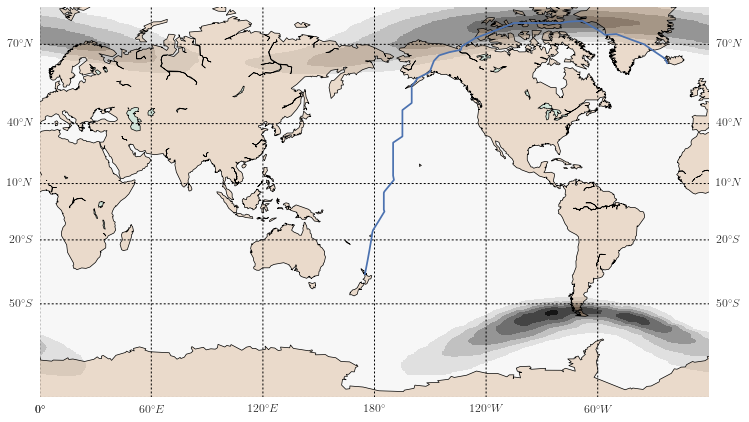

In [137]:
nlats = 512
nlons = 1024
lats=np.linspace(-90,90,nlats)
lons=np.linspace(0,360,nlons)
#m = Basemap(projection='ortho',lat_0=-70,lon_0=-100,resolution='l')
m=Basemap(llcrnrlon=0,llcrnrlat=-80,urcrnrlon=360,urcrnrlat=80,projection='mill')
m.drawcoastlines(linewidth=0.7)
m.fillcontinents(color='#cc9966',lake_color='#99ffff',alpha=0.3)
m.drawparallels(np.arange(-80,81,30),labels=[1,1,0,0])
m.drawmeridians(np.arange(0,360,60),labels=[0,0,0,1])
m.contourf(X,Y,aurora,latlon=True)
m.plot(lon,lat,latlon=True)

In [138]:
from scipy.interpolate import interp2d
f = interp2d(lons,lats, aurora)

In [139]:
prob= [f(lon[i],lat[i]) for i in range(lon.shape[0])]

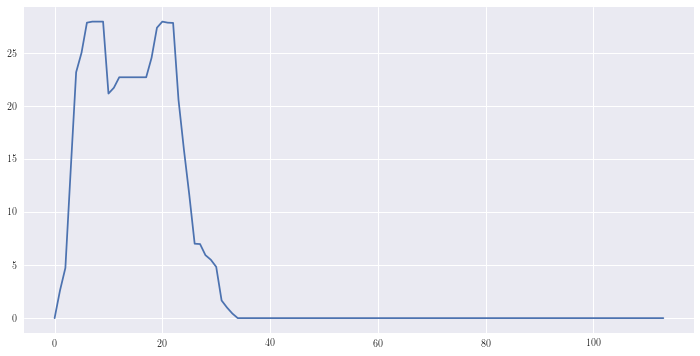

In [140]:
fig,ax=plt.subplots(figsize=(12,6))
ax.plot(prob)

In [97]:
aurora.T.shape

(1024, 512)